## Depandecies

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload


## Dataset preprocessing 


In [2]:
# Resize ALL Images adding a padding black and prepare the data 
#read all images 
images_c1 = glob.glob('./Datasets/train/carote/*.jpg')
images_c2 = glob.glob('./Datasets/train/onion/*.jpg')
images_c3 = glob.glob('./Datasets/train/fenouil/*.jpg')
images_c4 = glob.glob('./Datasets/train/potato/*.jpg')
images_c5 = glob.glob('./Datasets/train/tomato/*.jpg')
images_c6 = glob.glob('./Datasets/train/cucumber/*.jpg')
images_c7 = glob.glob('./Datasets/train/choufleur/*.jpg')
images_c8 = glob.glob('./Datasets/train/poischiche/*.jpg')
images_c9 = glob.glob('./Datasets/train/poivron/*.jpg')
images_c10 = glob.glob('./Datasets/train/arichou/*.jpg')
#prepare the input and output arrays
Xtrain = np.zeros((250,128,128,3)) #(image(256*256*3) X, class Y)
Ytrain = np.ones((250))
Xval = np.zeros((100,128,128,3)) #(image(256*256*3) X, class Y)
Yval = np.ones((100))
Xtest = np.zeros((50,128,128,3)) #(image(256*256*3) X, class Y)
Ytest = np.ones((50))

#LOOP THE IMAGES TO RESIZE AND PREPARE THE INPUT AND OUTPUT ARRAYS
j =0
m=0
n=0
for i in range(len(images_c1)*10):
    images = images_c1
    c = 0
    if i >= 40 :
        images = images_c2 
        c = 1
    if i >= 80: 
        images = images_c3
        c = 2
    if i >= 120: 
        images = images_c4
        c = 3
    if i >= 160: 
        images = images_c5
        c = 4
    if i >= 200: 
        images = images_c6
        c = 5
    if i >= 240: 
        images = images_c7
        c = 6
    if i >= 280: 
        images = images_c8
        c = 7
    if i >= 320: 
        images = images_c9
        c = 8
    if i >= 360: 
        images = images_c10
        c = 9
    img = cv2.imread(images[i%40])
    imgF = np.ones((512,512,3),np.uint8)*0
    imgF[0:min(img.shape[0],512),0:min(img.shape[1],512),:] = img[0:min(img.shape[0],512),0:min(img.shape[1],512),:]
    imgF = cv2.resize(imgF, (0, 0), fx = 0.25, fy = 0.25)
    if (i%40) < 25: 
        Xtrain[j] = imgF
        Ytrain[j] = c
        j = j+1
    elif (i%40) < 35 :
        Xval[m] = imgF
        Yval[m] = c
        m = m + 1 
    else : 
        Xtest[n] = imgF
        Ytest[n] = c
        n = n + 1 


In [3]:
## NORMALIZE THE DATASETS
print(np.max(Xtrain))
Xtrain = Xtrain / np.max(Xtrain)
Xval = Xval / np.max(Xtrain)
Xtest = Xtest / np.max(Xtrain)
print(np.max(Xtrain))


255.0
1.0


In [4]:
print(j)
print(m)
print(n)

250
100
50


## The model

In [5]:

output_class = 10
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(Xtrain.shape[1], Xtrain.shape[2], Xtrain.shape[3])))
model.add(Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 131072)            0

## Train the model

In [6]:
batch_size  = 100
epochs      = 50

history = model.fit(  Xtrain, Ytrain,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      validation_data = (Xval, Yval))
score = model.evaluate(Xtest, Ytest, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Epoch 1/50
3/3 [==============================] - 15s 4s/step - loss: 2.7280 - accuracy: 0.1120 - val_loss: 197.3798 - val_accuracy: 0.2400
Epoch 2/50
3/3 [==============================] - 17s 6s/step - loss: 2.0145 - accuracy: 0.2560 - val_loss: 138.4901 - val_accuracy: 0.2400
Epoch 3/50
3/3 [==============================] - 17s 5s/step - loss: 1.6202 - accuracy: 0.4040 - val_loss: 191.7647 - val_accuracy: 0.3500
Epoch 4/50
3/3 [==============================] - 15s 4s/step - loss: 1.1897 - accuracy: 0.5680 - val_loss: 196.3738 - val_accuracy: 0.4500
Epoch 5/50
3/3 [==============================] - 11s 3s/step - loss: 0.9608 - accuracy: 0.7080 - val_loss: 204.9694 - val_accuracy: 0.4500
Epoch 6/50
3/3 [==============================] - 11s 3s/step - loss: 0.7551 - accuracy: 0.7920 - val_loss: 262.7328 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 17s 7s/step - loss: 0.6460 - accuracy: 0.8080 - val_loss: 287.7118 - val_accuracy: 0.4700
Epoch 8/50
3/3 [====

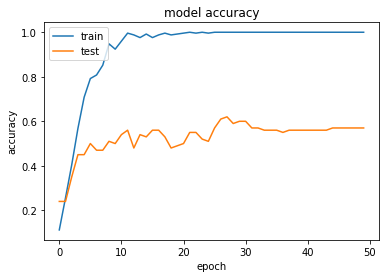

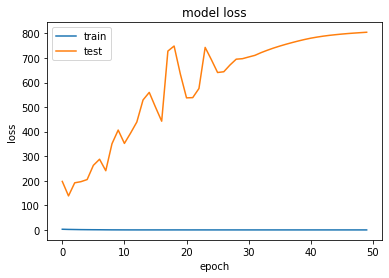

In [7]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
np.round(model.predict(Xtest))


2/2 [==============================] - 1s 301ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 